# NLP With Hotel Review Part 1

#### Author: Amirhossein Kiani
#### Contact: amkoxia@gmail.com
#### Date: 07/05/2023

## Introduction to the NLP Analysis of Hotel Reviews Project
In today's rapidly evolving hospitality industry, understanding customer sentiment and feedback has become more critical than ever. As hotels strive to deliver exceptional guest experiences, tapping into the wealth of information contained within customer reviews is invaluable. The NLP Analysis of Hotel Reviews project aims to harness the power of Natural Language Processing (NLP) techniques to extract insights, trends, and actionable intelligence from a vast corpus of hotel reviews.

### Project Goals

The primary objectives of this project are to:

- **Uncover Valuable Insights:** By analyzing customer reviews, we seek to uncover hidden patterns, sentiments, and feedback that can provide deep insights into guests' experiences and expectations.

- **Enhance Business Strategies:** The insights gained from this analysis will drive strategic decision-making across various departments within the hospitality industry. From operations and service improvement to marketing and customer relations, these insights will offer a holistic view of customer perceptions.

- **Improve Guest Experiences:** Armed with a better understanding of what delights and disappoints guests, hotels can tailor their services, amenities, and overall experience to meet customer expectations and preferences.

- **Provide Actionable Intelligence:** The project aims to deliver not just raw data, but actionable intelligence. This includes recommendations, trends, and predictions that can drive effective, data-driven strategies.

### Value Proposition

By combining the power of data analytics, NLP, and machine learning, this project aspires to offer the hospitality industry a comprehensive toolkit for understanding, analyzing, and responding to customer feedback. The insights provided have the potential to significantly impact business strategies, leading to improved guest satisfaction, stronger brand loyalty, and ultimately, greater success in an increasingly competitive landscape.

### Importing libraries and exploring the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [69]:
df = pd.read_csv('Hotel_Reviews.csv')

In [152]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,lat,lng,Review_Year,Review_Month,Review_Day
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2,0,52.360576,4.915968,2017,8,3
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7,0,52.360576,4.915968,2017,8,3
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,3,52.360576,4.915968,2017,7,31
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3,3,52.360576,4.915968,2017,7,31
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6,10,52.360576,4.915968,2017,7,24


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [72]:
df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

### 1.a. What is the shape of the dataset?

In [73]:
df.shape

(515738, 17)

The shape of the dataset is (515738, 17), meaning that it has 515738 rows and 17 columns.

### 1.b. The reviews provided are all given as decimal values. Convert them into integers from 1 to 10.

In [74]:
df['Reviewer_Score'] = df['Reviewer_Score'].apply(lambda score: int(score))
df['Reviewer_Score']

0         2
1         7
2         7
3         3
4         6
         ..
515733    7
515734    5
515735    2
515736    8
515737    8
Name: Reviewer_Score, Length: 515738, dtype: int64

In [75]:
df['Reviewer_Score'].dtype

dtype('int64')

In [76]:
df['Average_Score'] = df['Average_Score'].apply(lambda score: int(score))
df['Average_Score']

0         7
1         7
2         7
3         7
4         7
         ..
515733    8
515734    8
515735    8
515736    8
515737    8
Name: Average_Score, Length: 515738, dtype: int64

In [77]:
df['Average_Score'].dtype

dtype('int64')

### 1.c. The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?

I expect the distribuition to be even accross all ratings, but we can see that it is left-skewed.

In [78]:
keys = df['Reviewer_Score'].value_counts().keys()
values = df['Reviewer_Score'].value_counts().values

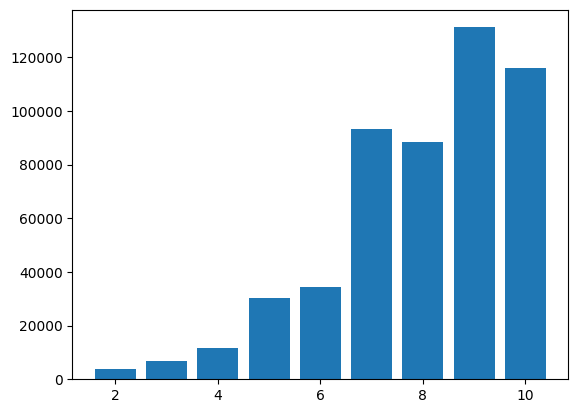

In [79]:
plt.bar(keys, values)
plt.show()

## 1.d. Given this will be a classification problem, what is a potential problem with this distribution?

One potential problem with this distribution is class imbalance. Class imbalance occurs when the distribution of classes in the target variable is heavily skewed towards one class compared to the others. In this case, the majority of the scores are concentrated at the higher end of the scale (scores of 10.0, 9.6, 9.2), while the lower scores have much fewer instances.

Imbalanced classes can pose challenges for classification models because they may lead to biased predictions and reduced accuracy. Models trained on imbalanced data tend to be biased towards the majority class, resulting in poor performance for predicting minority classes. In this scenario, it means the model might be better at predicting positive scores (higher values) but could struggle with accurately predicting negative scores (lower values) due to the scarcity of instances in those classes.

To address this issue, we can perform **resampling**, which involves either oversampling the minority class (increasing the number of instances) or undersampling the majority class (decreasing the number of instances) to achieve a balanced class distribution.

However, we will soon see that given the data bucketing that we perfrom later, this problem will be automatically addressed.

### 2. This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

Non-numeric columns:

In [80]:
df.dtypes[df.dtypes == 'object']

Hotel_Address           object
Review_Date             object
Hotel_Name              object
Reviewer_Nationality    object
Negative_Review         object
Positive_Review         object
Tags                    object
days_since_review       object
dtype: object

Numeric columns:

In [81]:
df.dtypes[df.dtypes != 'object']

Additional_Number_of_Scoring                    int64
Average_Score                                   int64
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
lat                                           float64
lng                                           float64
dtype: object

Turning `Review_Date` into numbers:

In [82]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

In [83]:
df['Review_Year'] = df['Review_Date'].apply(lambda date: date.year)
df['Review_Month'] = df['Review_Date'].apply(lambda date: date.month)
df['Review_Day'] = df['Review_Date'].apply(lambda date: date.day)

Dropping the original `Review_Date` column:

In [84]:
df.drop(['Review_Date'], axis=1, inplace=True)

In [85]:
df.sample()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_Year,Review_Month,Review_Day
14979,1 Waterview Drive Greenwich London SE10 0TW Un...,1258,9,Intercontinental London The O2,United Kingdom,Dodgy phone reception Window view was not goo...,14,4204,Just amazing to relax in and comfortable A lo...,27,1,9,"[' Leisure trip ', ' Solo traveler ', ' Superi...",84 days,51.502435,-0.00025,2017,5,11


Turning `days_since_review` into numeric values:

In [86]:
df['days_since_review'] = df['days_since_review'].apply(lambda x: int(x.split(' ')[0]))
df['days_since_review']

0           0
1           0
2           3
3           3
4          10
         ... 
515733    704
515734    712
515735    715
515736    717
515737    725
Name: days_since_review, Length: 515738, dtype: int64

In [87]:
df.dtypes[df.dtypes == 'object']

Hotel_Address           object
Hotel_Name              object
Reviewer_Nationality    object
Negative_Review         object
Positive_Review         object
Tags                    object
dtype: object

In [88]:
df.dtypes[df.dtypes != 'object']

Additional_Number_of_Scoring                    int64
Average_Score                                   int64
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int64
days_since_review                               int64
lat                                           float64
lng                                           float64
Review_Year                                     int64
Review_Month                                    int64
Review_Day                                      int64
dtype: object

### 3. Build the proper dataset separation (Optional but recommended: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)


I'll sample 10% of the data:

In [89]:
df10 = df.sample(int(.1*len(df)))

In [90]:
df10.sample()

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Review_Year,Review_Month,Review_Day
96694,20 Lavington Street Southwark London SE1 0NZ U...,804,9,citizenM London Bankside,United Kingdom,The size of the room was claustrophobic for m...,27,3802,We thought the layout of the ground floor was...,25,6,8,"[' Leisure trip ', ' Couple ', ' Double Room '...",548,51.505151,-0.100472,2016,2,2


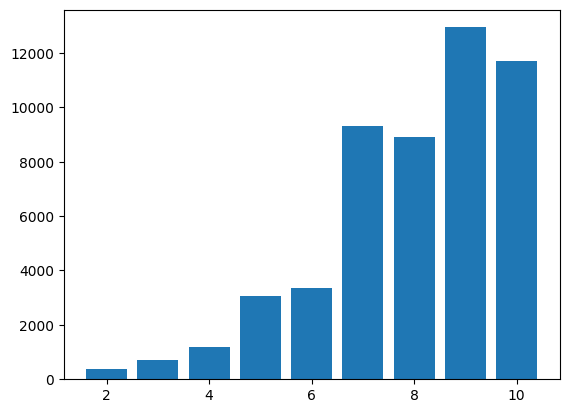

In [91]:
keys = df10['Reviewer_Score'].value_counts().keys()
values = df10['Reviewer_Score'].value_counts().values

plt.bar(keys, values)
plt.show()

We can see the original distribuition of the data hasn't changed much.

### 3.a. Convert the `Reviewer_Score` column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

In [92]:
df10['Reviewer_Score'].value_counts()

Reviewer_Score
9     12942
10    11714
7      9315
8      8924
6      3350
5      3050
4      1174
3       717
2       387
Name: count, dtype: int64

In [93]:
df10['Reviewer_Score'] = np.where(df10['Reviewer_Score']>=9, 1, 0)

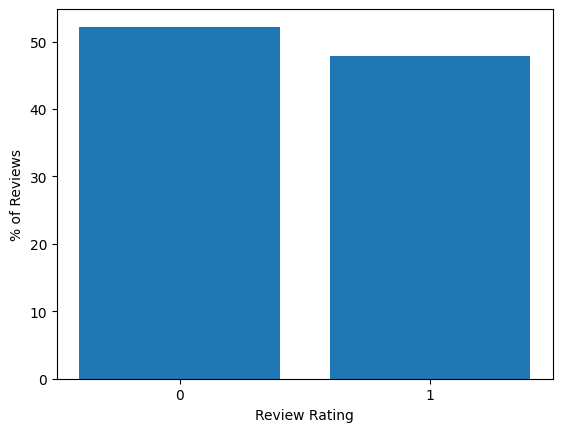

Class imbalance: [0.52 0.48]


In [94]:
values, counts = np.unique(df10['Reviewer_Score'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100) # plot normalized counts
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

We can see that the original class imbalance is faily improved after data bucketting.

### 3b. Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except `Positive_Review` and `Negative_Review`.


Bebin to ye chand ta az non numeric haro entekhab kon masalan Date va azashoon masalan month numbers, year, week numbers, day .. ina ro bekesh biroon ke onehot encoding nemikhad. Bad masalan baraye address ham mitooni faghat esme keshvara ya city ro bekeshi biroon ba get dummies ya onehotencoding koni ke ziad nemishe

In [95]:
df10.dtypes[df.dtypes == 'object']

Hotel_Address           object
Hotel_Name              object
Reviewer_Nationality    object
Negative_Review         object
Positive_Review         object
Tags                    object
dtype: object

Let's first deal with `Hotel_Address`:

In [96]:
df10['Hotel_Address'].nunique()

1484

In [97]:
df10['Hotel_Address'].value_counts()

Hotel_Address
163 Marsh Wall Docklands Tower Hamlets London E14 9SJ United Kingdom              480
372 Strand Westminster Borough London WC2R 0JJ United Kingdom                     437
Westminster Bridge Road Lambeth London SE1 7UT United Kingdom                     399
Scarsdale Place Kensington Kensington and Chelsea London W8 5SY United Kingdom    347
7 Pepys Street City of London London EC3N 4AF United Kingdom                      341
                                                                                 ... 
53 Rue Richard Lenoir 11th arr 75011 Paris France                                   1
Jaime I 14 Ciutat Vella 08002 Barcelona Spain                                       1
Piazza Oberdan 12 Milan City Center 20129 Milan Italy                               1
8 bis Avenue de la Soeur Rosalie 13th arr 75013 Paris France                        1
6 Rue Saint Placide 6th arr 75006 Paris France                                      1
Name: count, Length: 1484, dtype: int64

We see that there are 1479 addresses. This would be too many variabls for one-hot encoding. The last two words seem to represent city and country. Let's check:

In [98]:
df10['Hotel_Address'].apply(lambda address: address.split(' ')[-2:])

184215           [United, Kingdom]
322969           [Vienna, Austria]
9364             [United, Kingdom]
50419            [United, Kingdom]
381038    [Amsterdam, Netherlands]
                    ...           
330098          [Barcelona, Spain]
9267             [United, Kingdom]
476441              [Milan, Italy]
84007            [United, Kingdom]
144098           [United, Kingdom]
Name: Hotel_Address, Length: 51573, dtype: object

In [99]:
pd.DataFrame(df10['Hotel_Address'].apply(lambda address: address.split(' ')[-2:]))['Hotel_Address'].value_counts()

Hotel_Address
[United, Kingdom]           26149
[Paris, France]              6108
[Barcelona, Spain]           5973
[Amsterdam, Netherlands]     5726
[Vienna, Austria]            3961
[Milan, Italy]               3656
Name: count, dtype: int64

I'll extract the countries embedded in these addresses, which appear as th elast word in the address. After that we can turn the hotel countries into one-hot vectors. Note that United Kindom will turn into 'Kindom' if we just select the last word in the address. I'll just leave that as is because we know that 'Kingdom' refers to the UK. (We could instead map 'Kingdom' to 'UK' and the other countries to themselves; I'll just omit this option.)

In [100]:
df10['Hotel_Country'] = df10['Hotel_Address'].apply(lambda address: address.split(' ')[-1])

In [101]:
df10['Hotel_Country'].value_counts()

Hotel_Country
Kingdom        26149
France          6108
Spain           5973
Netherlands     5726
Austria         3961
Italy           3656
Name: count, dtype: int64

In [106]:
hotel_country = pd.get_dummies(df10['Hotel_Country'],dtype='int')
hotel_country

,Austria,France,Italy,Kingdom,Netherlands,Spain
184215,0,0,0,1,0,0
322969,1,0,0,0,0,0
9364,0,0,0,1,0,0
50419,0,0,0,1,0,0
381038,0,0,0,0,1,0
...,...,...,...,...,...,...
330098,0,0,0,0,0,1
9267,0,0,0,1,0,0
476441,0,0,1,0,0,0
84007,0,0,0,1,0,0


In [109]:
df10 = pd.concat([df10, hotel_country],axis=1)
df10

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,Review_Year,Review_Month,Review_Day,Hotel_Country,Austria,France,Italy,Kingdom,Netherlands,Spain
184215,41 54 Buckingham Gate Westminster Borough Lond...,1299,8,St James Court A Taj Hotel London,United Kingdom,The loud generator outside the window,7,5394,The staff were very friendly and helpful and ...,13,...,2017,1,9,Kingdom,0,0,0,1,0,0
322969,F hrichgasse 10 01 Innere Stadt 1010 Vienna Au...,155,9,The Guesthouse Vienna,Belgium,Nothing not to like,5,951,All the extra little touches,7,...,2017,5,4,Austria,1,0,0,0,0,0
9364,1 Inverness Terrace Westminster Borough London...,1274,7,Grand Royale London Hyde Park,Egypt,Rest room in the old room was very small to e...,19,6539,The keeping house manager was more than perfe...,33,...,2016,1,25,Kingdom,0,0,0,1,0,0
50419,140 Gloucester Road Kensington and Chelsea Lon...,528,8,The Bailey s Hotel London,New Zealand,The room did not reflect the 25m2 advertised ...,12,2485,Great Location,4,...,2016,5,9,Kingdom,0,0,0,1,0,0
381038,Molenwerf 1 1014 AG Amsterdam Netherlands,914,8,Golden Tulip Amsterdam West,United Kingdom,nothing to add,4,7586,Friendly and accessible bar,6,...,2016,5,24,Netherlands,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330098,Gran Via 605 Eixample 08007 Barcelona Spain,343,8,Avenida Palace,United Kingdom,No view dark room rumble from the metro drink...,22,3222,Comfy bed clean room lovely towels and bed li...,36,...,2017,4,5,Spain,0,0,0,0,0,1
9267,1 Inverness Terrace Westminster Borough London...,1274,7,Grand Royale London Hyde Park,United Kingdom,Room was upgraded to a basement room that was...,81,6539,Location close to tube Paddington Bed was com...,10,...,2016,3,3,Kingdom,0,0,0,1,0,0
476441,Via Galileo Galilei 2 Central Station 20124 Mi...,207,8,Windsor Hotel Milano,Portugal,Bad wifi,3,2601,Breakfast,2,...,2017,5,23,Italy,0,0,1,0,0,0
84007,1a Lexham Gardens Kensington and Chelsea Londo...,222,7,Mercure London Kensington Hotel,United Kingdom,Noise from the corridors other rooms not the ...,46,1016,The room was comfortable staff helpful and fr...,47,...,2016,6,16,Kingdom,0,0,0,1,0,0


In [110]:
df10.drop(['Hotel_Address', 'Hotel_Country'],axis=1, inplace=True)

In [111]:
df10.head()

,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,...,lng,Review_Year,Review_Month,Review_Day,Austria,France,Italy,Kingdom,Netherlands,Spain
184215,1299,8,St James Court A Taj Hotel London,United Kingdom,The loud generator outside the window,7,5394,The staff were very friendly and helpful and ...,13,2,...,-0.137687,2017,1,9,0,0,0,1,0,0
322969,155,9,The Guesthouse Vienna,Belgium,Nothing not to like,5,951,All the extra little touches,7,15,...,16.369036,2017,5,4,1,0,0,0,0,0
9364,1274,7,Grand Royale London Hyde Park,Egypt,Rest room in the old room was very small to e...,19,6539,The keeping house manager was more than perfe...,33,1,...,-0.186342,2016,1,25,0,0,0,1,0,0
50419,528,8,The Bailey s Hotel London,New Zealand,The room did not reflect the 25m2 advertised ...,12,2485,Great Location,4,1,...,-0.182496,2016,5,9,0,0,0,1,0,0
381038,914,8,Golden Tulip Amsterdam West,United Kingdom,nothing to add,4,7586,Friendly and accessible bar,6,16,...,4.847060,2016,5,24,0,0,0,0,1,0


Now time for `Hotel_Name`: this category doesn't really matter for our purposes. There are too many names, and we have already extracted useful info such a the location of the hotel from the hotel address:

In [112]:
df10['Hotel_Name'].nunique()

1483

In [114]:
df10['Hotel_Name'].value_counts()

Hotel_Name
Britannia International Hotel Canary Wharf           480
Strand Palace Hotel                                  437
Park Plaza Westminster Bridge London                 399
Copthorne Tara Hotel London Kensington               347
DoubleTree by Hilton Hotel London Tower of London    341
                                                    ... 
Hotel Mercure Milano Centro                            1
Renaissance Paris Le Parc Trocadero Hotel              1
Hotel Le Mareuil                                       1
Hotel Gallitzinberg                                    1
Hotel Le Placide Saint Germain Des Pr s                1
Name: count, Length: 1483, dtype: int64

So we just drop the column:

In [115]:
df10.drop(['Hotel_Name'],axis=1, inplace=True)

Now time `Reviewer_Nationality`:

In [119]:
df10['Reviewer_Nationality'].value_counts()

Reviewer_Nationality
 United Kingdom               24552
 United States of America      3443
 Australia                     2087
 Ireland                       1473
 United Arab Emirates          1074
                              ...  
 Antigua Barbuda                  1
 St Maarten                       1
 Suriname                         1
 Laos                             1
 French Polynesia                 1
Name: count, Length: 181, dtype: int64

We have 181 nationalities. This is an alright number for dumiffication. Just to make sure we don't confuse the nationality with hotel country, I'll first add 'Rev_Nat' in the beginning of each nationality, and then dummify the variables:

In [125]:
df10['Reviewer_Nationality'] = df10['Reviewer_Nationality'].apply(lambda nationality: 'Rev_Nat'+ nationality)
df10['Reviewer_Nationality']

184215    Rev_Nat United Kingdom 
322969           Rev_Nat Belgium 
9364               Rev_Nat Egypt 
50419        Rev_Nat New Zealand 
381038    Rev_Nat United Kingdom 
                   ...           
330098    Rev_Nat United Kingdom 
9267      Rev_Nat United Kingdom 
476441          Rev_Nat Portugal 
84007     Rev_Nat United Kingdom 
144098    Rev_Nat United Kingdom 
Name: Reviewer_Nationality, Length: 51573, dtype: object

In [127]:
reviewer_nationality = pd.get_dummies(df10['Reviewer_Nationality'],dtype='int')
reviewer_nationality 

,Rev_Nat,Rev_Nat Abkhazia Georgia,Rev_Nat Albania,Rev_Nat Algeria,Rev_Nat Andorra,Rev_Nat Angola,Rev_Nat Antigua Barbuda,Rev_Nat Argentina,Rev_Nat Armenia,Rev_Nat Aruba,...,Rev_Nat United Kingdom,Rev_Nat United States Minor Outlying Islands,Rev_Nat United States of America,Rev_Nat Uruguay,Rev_Nat Uzbekistan,Rev_Nat Vanuatu,Rev_Nat Venezuela,Rev_Nat Vietnam,Rev_Nat Zambia,Rev_Nat Zimbabwe
184215,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
322969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381038,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330098,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9267,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
476441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84007,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [129]:
df10 = pd.concat([df10, reviewer_nationality],axis=1)
df10.head()

,Additional_Number_of_Scoring,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,...,Rev_Nat United Kingdom,Rev_Nat United States Minor Outlying Islands,Rev_Nat United States of America,Rev_Nat Uruguay,Rev_Nat Uzbekistan,Rev_Nat Vanuatu,Rev_Nat Venezuela,Rev_Nat Vietnam,Rev_Nat Zambia,Rev_Nat Zimbabwe
184215,1299,8,Rev_Nat United Kingdom,The loud generator outside the window,7,5394,The staff were very friendly and helpful and ...,13,2,1,...,1,0,0,0,0,0,0,0,0,0
322969,155,9,Rev_Nat Belgium,Nothing not to like,5,951,All the extra little touches,7,15,1,...,0,0,0,0,0,0,0,0,0,0
9364,1274,7,Rev_Nat Egypt,Rest room in the old room was very small to e...,19,6539,The keeping house manager was more than perfe...,33,1,0,...,0,0,0,0,0,0,0,0,0,0
50419,528,8,Rev_Nat New Zealand,The room did not reflect the 25m2 advertised ...,12,2485,Great Location,4,1,0,...,0,0,0,0,0,0,0,0,0,0
381038,914,8,Rev_Nat United Kingdom,nothing to add,4,7586,Friendly and accessible bar,6,16,1,...,1,0,0,0,0,0,0,0,0,0


In [130]:
df10.drop(['Reviewer_Nationality'],axis=1,inplace=True)

In [132]:
df10.head(1)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,...,Rev_Nat United Kingdom,Rev_Nat United States Minor Outlying Islands,Rev_Nat United States of America,Rev_Nat Uruguay,Rev_Nat Uzbekistan,Rev_Nat Vanuatu,Rev_Nat Venezuela,Rev_Nat Vietnam,Rev_Nat Zambia,Rev_Nat Zimbabwe
184215,1299,8,The loud generator outside the window,7,5394,The staff were very friendly and helpful and ...,13,2,1,"[' Leisure trip ', ' Couple ', ' Classic Doubl...",...,1,0,0,0,0,0,0,0,0,0


let's see how what other categorical column has left:

In [141]:
df10.dtypes[df10.dtypes=='object']

Negative_Review    object
Positive_Review    object
Tags               object
dtype: object

In [143]:
df10['Tags'].nunique()

13955

We have too many tags (or lists of tags) to feature engineer. I'll just drop the column for convenience:

In [146]:
df10.drop(['Tags'],axis=1,inplace=True)

In [151]:
df10.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review,...,Rev_Nat United Kingdom,Rev_Nat United States Minor Outlying Islands,Rev_Nat United States of America,Rev_Nat Uruguay,Rev_Nat Uzbekistan,Rev_Nat Vanuatu,Rev_Nat Venezuela,Rev_Nat Vietnam,Rev_Nat Zambia,Rev_Nat Zimbabwe
184215,1299,8,The loud generator outside the window,7,5394,The staff were very friendly and helpful and ...,13,2,1,206,...,1,0,0,0,0,0,0,0,0,0
322969,155,9,Nothing not to like,5,951,All the extra little touches,7,15,1,91,...,0,0,0,0,0,0,0,0,0,0
9364,1274,7,Rest room in the old room was very small to e...,19,6539,The keeping house manager was more than perfe...,33,1,0,556,...,0,0,0,0,0,0,0,0,0,0
50419,528,8,The room did not reflect the 25m2 advertised ...,12,2485,Great Location,4,1,0,451,...,0,0,0,0,0,0,0,0,0,0
381038,914,8,nothing to add,4,7586,Friendly and accessible bar,6,16,1,436,...,1,0,0,0,0,0,0,0,0,0


In [148]:
df10.dtypes[df10.dtypes=='object']

Negative_Review    object
Positive_Review    object
dtype: object

We have successfully turned most categorical columns into numeric ones and dropped all the categorical columns except the ones having to do with reviews.

## 3.c. Split the data into train and test sets.


In [166]:
X = df10.drop(['Reviewer_Score'],axis=1)
y = df10[['Reviewer_Score']]

In [202]:
X.head()

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,...,Rev_Nat United Kingdom,Rev_Nat United States Minor Outlying Islands,Rev_Nat United States of America,Rev_Nat Uruguay,Rev_Nat Uzbekistan,Rev_Nat Vanuatu,Rev_Nat Venezuela,Rev_Nat Vietnam,Rev_Nat Zambia,Rev_Nat Zimbabwe
184215,1299,0,The loud generator outside the window,7,5394,The staff were very friendly and helpful and ...,13,2,206,51.498673,...,1,0,0,0,0,0,0,0,0,0
322969,155,1,Nothing not to like,5,951,All the extra little touches,7,15,91,48.205130,...,0,0,0,0,0,0,0,0,0,0
9364,1274,0,Rest room in the old room was very small to e...,19,6539,The keeping house manager was more than perfe...,33,1,556,51.510995,...,0,0,0,0,0,0,0,0,0,0
50419,528,0,The room did not reflect the 25m2 advertised ...,12,2485,Great Location,4,1,451,51.493873,...,0,0,0,0,0,0,0,0,0,0
381038,914,0,nothing to add,4,7586,Friendly and accessible bar,6,16,436,52.385601,...,1,0,0,0,0,0,0,0,0,0


In [203]:
y.head()

,Reviewer_Score
184215,1
322969,1
9364,0
50419,0
381038,1


In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #2/3 data -> trained

In [169]:
X_train

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,...,Rev_Nat United Kingdom,Rev_Nat United States Minor Outlying Islands,Rev_Nat United States of America,Rev_Nat Uruguay,Rev_Nat Uzbekistan,Rev_Nat Vanuatu,Rev_Nat Venezuela,Rev_Nat Vietnam,Rev_Nat Zambia,Rev_Nat Zimbabwe
154315,171,0,No Negative,0,823,Perfect location only 10 min walk from euston...,16,3,203,51.519793,...,1,0,0,0,0,0,0,0,0,0
10648,1274,0,Nothing,2,6539,Abso loved this hotel booked last minute and ...,26,1,471,51.510995,...,1,0,0,0,0,0,0,0,0,0
374793,87,1,Simple teapot a bit pricy,6,593,Sitting in the hotel courtyard,6,4,232,41.394507,...,0,0,0,0,0,0,0,0,0,0
447477,416,0,TV s were terrible,6,5177,Great location Excellent staff comfortable ro...,11,1,667,48.214662,...,0,0,1,0,0,0,0,0,0,0
340391,234,1,Breakfast is a banana and a yoghurt hung by y...,13,1075,Bar is buzzing in the evening staff are very ...,29,2,252,52.371867,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99159,305,0,No Negative,0,1719,Very welcoming staff and a great breakfast sp...,10,2,595,51.491571,...,1,0,0,0,0,0,0,0,0,0
302428,282,0,Nothing,2,2875,I totally enjoyed my stay Breakfast was great...,110,7,333,45.475884,...,0,0,0,0,0,0,0,0,0,0
195229,205,0,Breakfast was expensive and in a basement wit...,24,1966,The bed was very comfortable and the room had...,17,7,281,48.875336,...,0,0,0,0,0,0,0,0,0,0
11103,1274,0,the bedroom was small and in need of upgrading,10,6539,the staff were very helpful,6,12,637,51.510995,...,1,0,0,0,0,0,0,0,0,0


In [170]:
from sklearn.feature_extraction.text import CountVectorizer #BoW vectorizer

In [171]:
X_train['Negative_Review']

154315                                          No Negative
10648                                               Nothing
374793                            Simple teapot a bit pricy
447477                                  TV s were terrible 
340391     Breakfast is a banana and a yoghurt hung by y...
                                ...                        
99159                                           No Negative
302428                                              Nothing
195229     Breakfast was expensive and in a basement wit...
11103        the bedroom was small and in need of upgrading
263560                                       Nothing really
Name: Negative_Review, Length: 34553, dtype: object

In [191]:
# 1. Instantiate
bagofwords = CountVectorizer(stop_words="english", min_df=5) #min_df = 5 -> I need a word to be present in atleast 5 reviews to even care 

# 2. Fit
bagofwords.fit(X_train['Negative_Review'])

# 3. Transform
X_train_negatives_transformed = bagofwords.transform(X_train['Negative_Review'])
X_train_negatives_transformed = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=X_train_negatives_transformed.toarray())
display(X_train_negatives_transformed)

,00,00am,00pm,01,02,06,08,09,10,100,...,yellow,yes,yesterday,yoghurt,yogurt,young,younger,youth,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the sparse matrix has 34,553 rows and 4,122 columns. This means that there are 4,122 unique terms or tokens that appear in at least 5 negative reviews.

In [190]:
bagofwords.fit(X_train['Positive_Review'])

# 3. Transform
X_train_positives_transformed = bagofwords.transform(X_train['Positive_Review'])
X_train_positives_transformed = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data=X_train_positives_transformed.toarray())
display(X_train_positives_transformed)

,00,02,10,100,100m,10am,10min,10mins,10th,11,...,yellow,yes,yoghurt,yogurt,young,yum,yummy,ziggo,zone,zuid
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that the sparse matrix has 34,553 rows and 3,276 columns. This means that there are 3,276 unique terms or tokens that appear in at least 5 positive reviews.

In [200]:
X_train_numericals = X_train.drop(['Negative_Review','Positive_Review'],axis=1)
X_train_numericals.shape

(34553, 199)

Combining the positive and negative reviews matrices:

In [198]:
X_train_reviews = pd.concat([X_train_negatives_transformed,X_train_positives_transformed],axis=1)
X_train_reviews

,00,00am,00pm,01,02,06,08,09,10,100,...,yellow,yes,yoghurt,yogurt,young,yum,yummy,ziggo,zone,zuid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combining the original numerical fragment of the training set with the reviews matrix:

In [201]:
pd.concat([X_train_numericals,X_train_reviews],axis=1)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,Review_Year,...,yellow,yes,yoghurt,yogurt,young,yum,yummy,ziggo,zone,zuid
154315,171.0,0.0,0.0,823.0,16.0,3.0,203.0,51.519793,-0.124184,2017.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10648,1274.0,0.0,2.0,6539.0,26.0,1.0,471.0,51.510995,-0.186342,2016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374793,87.0,1.0,6.0,593.0,6.0,4.0,232.0,41.394507,2.163266,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447477,416.0,0.0,6.0,5177.0,11.0,1.0,667.0,48.214662,16.362799,2015.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340391,234.0,1.0,13.0,1075.0,29.0,2.0,252.0,52.371867,4.887379,2016.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.d. What does the `min_df` parameter do?

This parameter restricts the selected tokens to those that have appeared as many as the number assigned to it. In the case above, I chose `min_df = 5`, so that means our vectorizer only selects tokens that appear in at least 5 reviews.